In [1]:
import tensorflow as tf


In [2]:
from tensorflow import keras

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as pyplot

In [6]:
import cv2

In [7]:
import os

In [8]:
scale=5

In [9]:
df=pd.read_csv('words-tiny-dataframe.txt', delimiter="\t", header=None)

In [10]:
dpath='/home/kartik/'+df[0][0]+'/images/'

In [11]:
flist=os.listdir(dpath)

In [12]:
cdf=pd.DataFrame()

In [13]:
cdf['filename']=flist
cdf['class']=df[1][0]

In [14]:
x_train=[]
y_train=np.full(500,df[1][0])
i=1
for img in flist:
    image=cv2.imread(df[0][0]+'/images/'+img)
    image=np.asarray(image)
    x_train.append(image)

    

In [15]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [16]:
datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                     horizontal_flip=True,
                                                     vertical_flip=True)

In [17]:
x_train=x_train.reshape((x_train.shape[0],64,64,3))

In [18]:
wres=scale*x_train.shape[2]
hres=scale*x_train.shape[1]
npic=x_train.shape[0]
nchan=x_train.shape[3]

In [19]:
datagen.fit(x_train)

In [20]:
os.makedirs('images')

Found 500 images belonging to 1 classes.


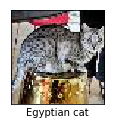

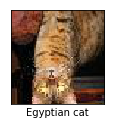

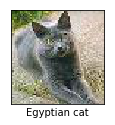

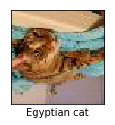

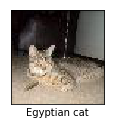

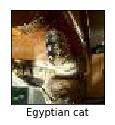

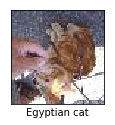

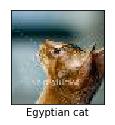

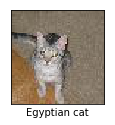

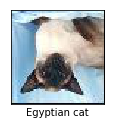

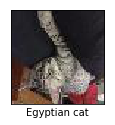

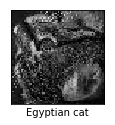

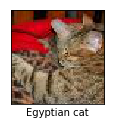

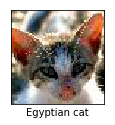

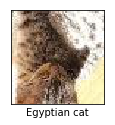

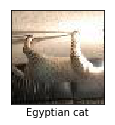

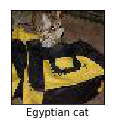

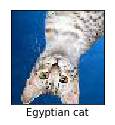

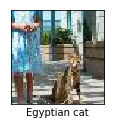

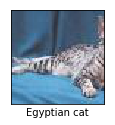

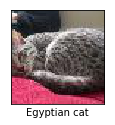

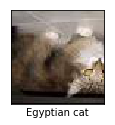

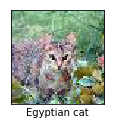

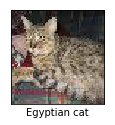

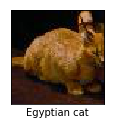

In [36]:
for x_batch, y_batch in datagen.flow_from_dataframe(cdf,
                                                    directory=dpath,
                                                    x_col="filename",
                                                    y_col="class",
                                                    class_mode='binary',
                                                    batch_size=25,
                                                    save_to_dir='images',
                                                    target_size=(hres,wres),
                                                    save_prefix='aug',
                                                    save_format='png'):
    for i in range(25):
        pyplot.figure(figsize=(10,10))
        pyplot.subplot(5,5,i+1)
        pyplot.xticks([])
        pyplot.yticks([])
        pyplot.grid=(False)
        pyplot.imshow(x_batch[i], cmap=pyplot.cm.binary)
        pyplot.xlabel(y_train[i])  
    break
        